In [1]:
!pip3 install -U yellowbrick

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.inspection import permutation_importance
import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
matplotlib.style.use(['seaborn-darkgrid', 'seaborn-colorblind', 'seaborn-notebook'])

In [3]:
path = 'spi_transfers_features_created.csv'

df = pd.read_csv(path, index_col=0)
pd.set_option('display.max_columns', None)

In [4]:
df.drop(columns=['year', 'team', 'league'], inplace=True)
columns = ['most_purchased_position', 'position_max_spend', 'position_min_spend']
df = pd.get_dummies(df, columns=columns)

display(df.sample(5))
df.shape

total_transfers_in  total_transfer_out  total_spend  total_earned  \
650                  11                  17        9.270         7.740   
719                  22                  20       10.800        44.235   
400                  21                  20       23.225        24.165   
496                  23                  18       12.600        15.440   
407                  15                  14       13.950         9.900   

     average_fee_spend  average_fee_earned  max_fee_spend  min_fee_spend  \
650           0.842727            0.455294           6.30            7.2   
719           0.490909            2.211750           7.20           27.9   
400           1.105952            1.208250          12.15           18.0   
496           0.547826            0.857778           7.20            7.2   
407           0.930000            0.707143           3.60            8.1   

     avg_season_spi  avg_spend_striker  avg_spend_centre_back  \
650           60.48             0.0000               2.490000   
719           63.12             2.4000               0.000000   
400           67.34             1.0125               0.000000   
496           51.92             1.0500               0.321429   
407           56.89             1.3500               0.000000   

     avg_spend_centre_mid  avg_spend_goalkeeper  avg_spend_left_winger  \
650                0.0000                 0.000                    0.0   
719                0.0000                 0.900                    0.0   
400                3.2625                 0.135                    0.0   
496                0.0000                 0.000                    0.0   
407                0.4500                 0.000                    1.8   

     avg_spend_right_winger  avg_spend_def_midfield  avg_spend_left_back  \
650                    0.00                   0.000                0.000   
719                    0.00                   0.000                0.900   
400                    2.03                   0.225                0.075   
496                    2.40                   0.000                0.000   
407                    0.00                   0.000                1.800   

     avg_spend_right_back  avg_spend_att_midfield  \
650                 1.800                     0.0   
719                 0.000                     0.0   
400                 2.700                     0.0   
496                 0.000                     0.0   
407                 1.575                     0.0   

     most_purchased_position_Attacking Midfield  \
650                                           0   
719                                           0   
400                                           0   
496                                           0   
407                                           0   

     most_purchased_position_Central Midfield  \
650                                         0   
719                                         0   
400                                         0   
496                                         0   
407                                         0   

     most_purchased_position_Centre-Back  \
650                                    1   
719                                    0   
400                                    0   
496                                    1   
407                                    1   

     most_purchased_position_Defensive Midfield  \
650                                           0   
719                                           0   
400                                           0   
496                                           0   
407                                           0   

     most_purchased_position_Goalkeeper  most_purchased_position_Left Winger  \
650                                   0                                    0   
719                                   0                                    0   
400                                   0                                    0 

(762, 49)

In [5]:
X = df.drop(columns=['avg_season_spi'])
y = df['avg_season_spi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
col_names = list(X_train.columns) # Will use this later

In [7]:
# RobustScaler
r_scaler = preprocessing.RobustScaler()
X_train_r = r_scaler.fit_transform(X_train)
X_train_r = pd.DataFrame(X_train_r, columns=col_names)

X_test_r = r_scaler.transform(X_test)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


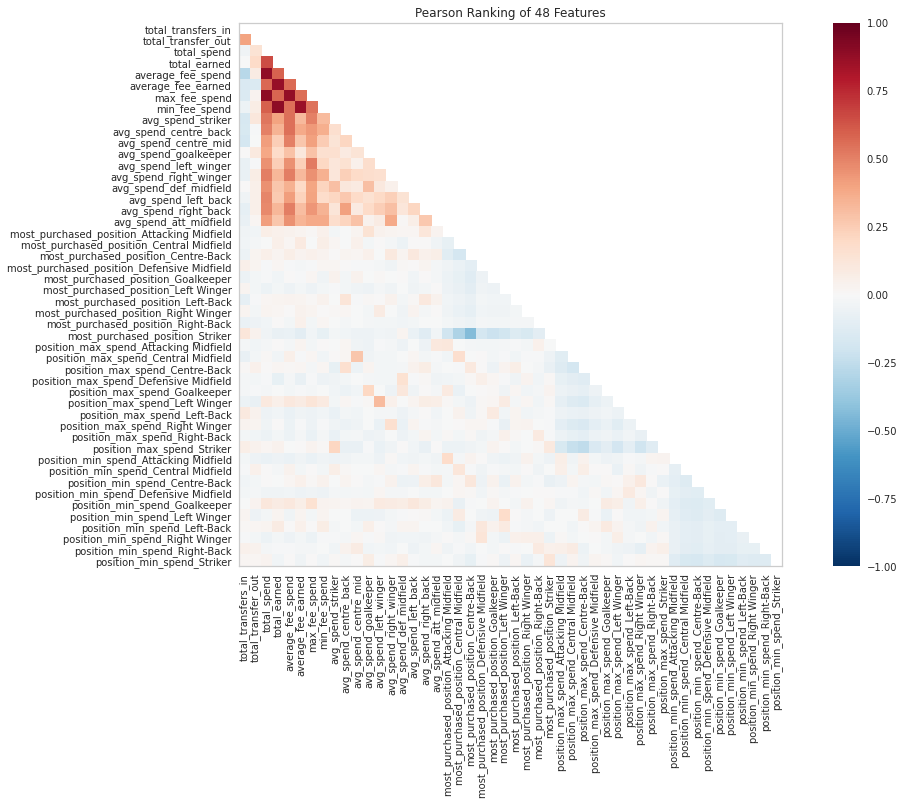

In [8]:
from yellowbrick.features import Rank2D

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
visualizer = Rank2D(algorithm='pearson')
visualizer.fit_transform(X)
visualizer.show();

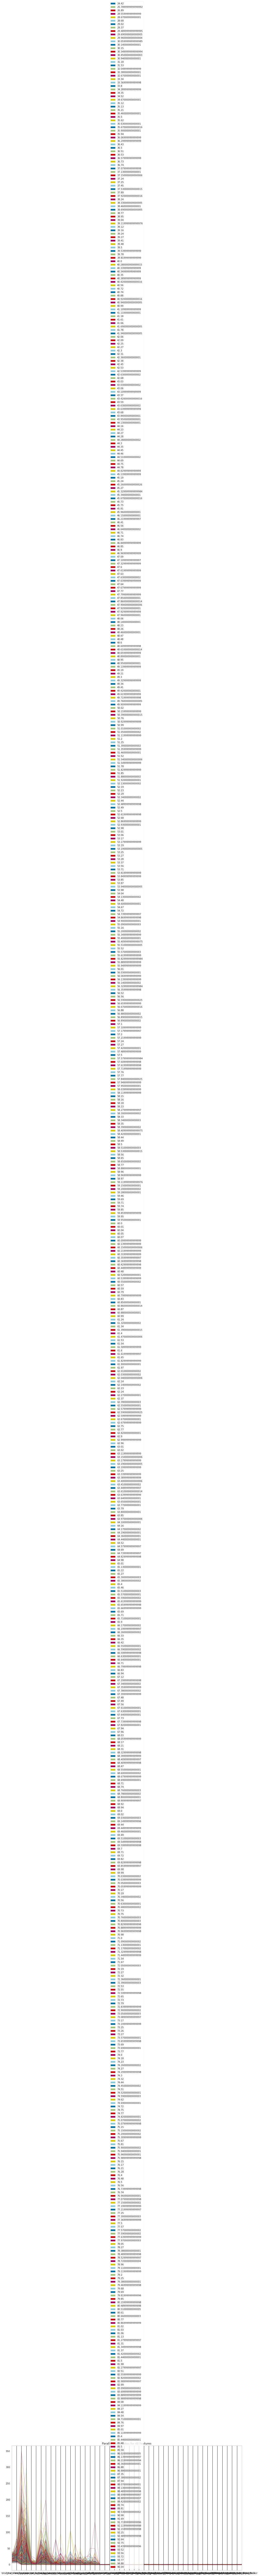

In [9]:
from yellowbrick.features import ParallelCoordinates

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
visualizer = ParallelCoordinates()
visualizer.fit_transform(X, y)
visualizer.show();

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


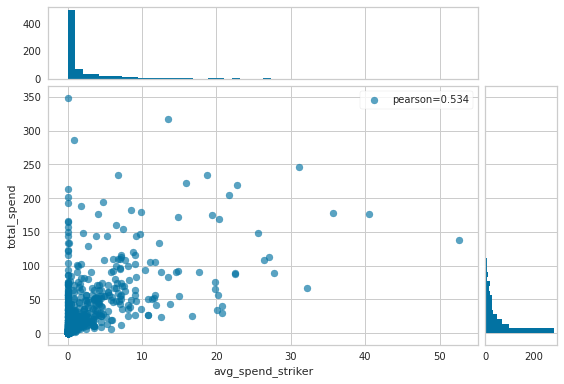

In [10]:
from yellowbrick.features import JointPlotVisualizer

visualizer = JointPlotVisualizer(columns=['avg_spend_striker', 'total_spend'])
visualizer.fit_transform(X, y)
visualizer.show();

In [11]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression

visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

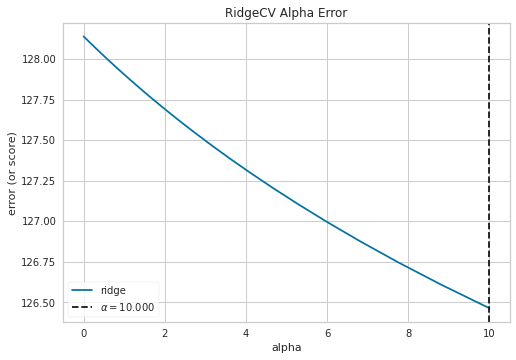

In [12]:
from sklearn.linear_model import RidgeCV
from yellowbrick.regressor import AlphaSelection

alphas = np.logspace(-10, 1, 200)
visualizer = AlphaSelection(RidgeCV(alphas=alphas))
visualizer.fit(X, y)
visualizer.show();

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


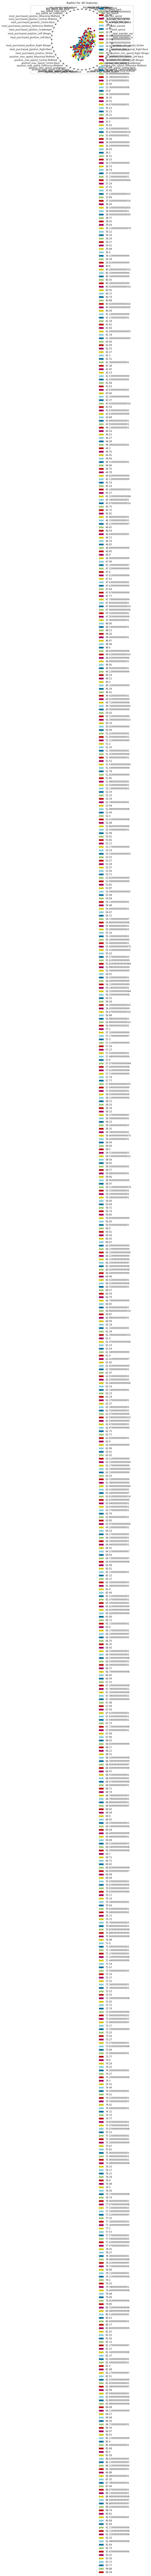

In [13]:
from yellowbrick.features import RadViz

visualizer = RadViz()
visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show();

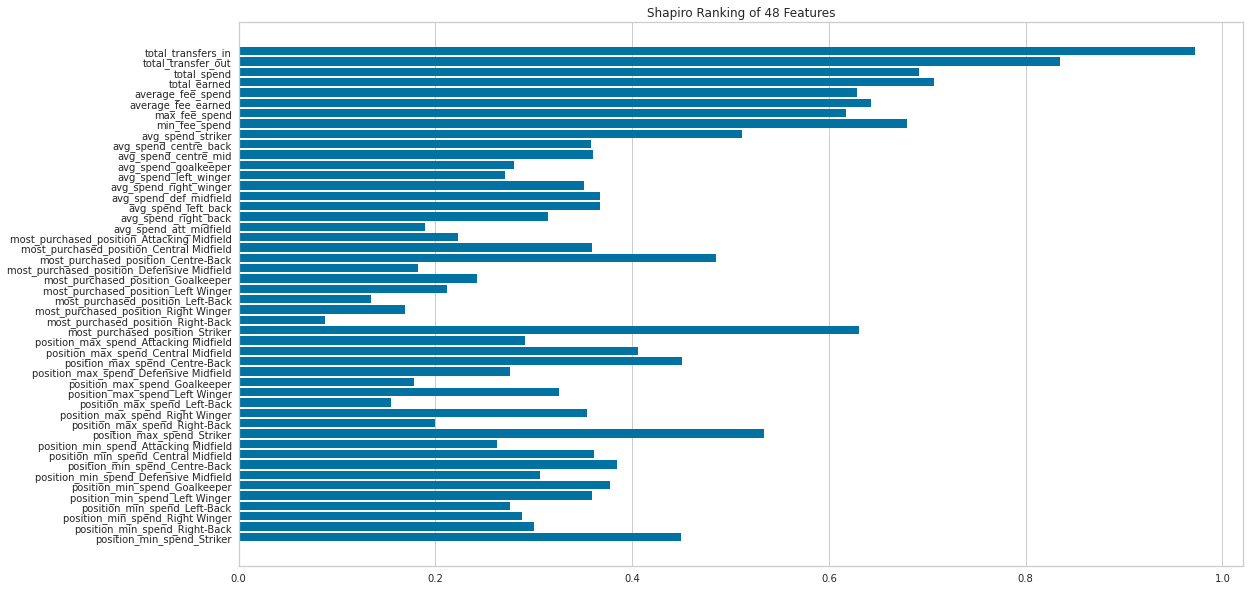

In [14]:
from yellowbrick.features import Rank1D

visualizer = Rank1D(algorithm='shapiro')

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show();

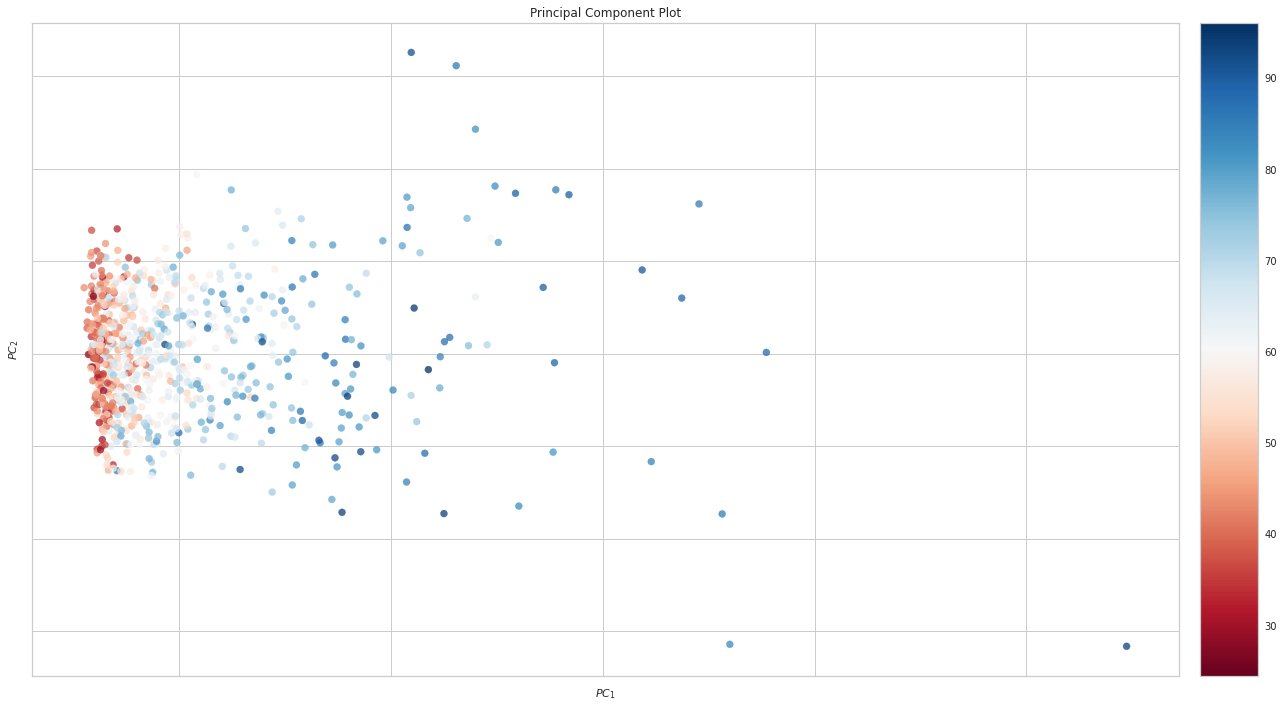

In [15]:
from yellowbrick.features import PCA

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)

visualizer = PCA(scale=True)
visualizer.fit_transform(X, y)
visualizer.show();

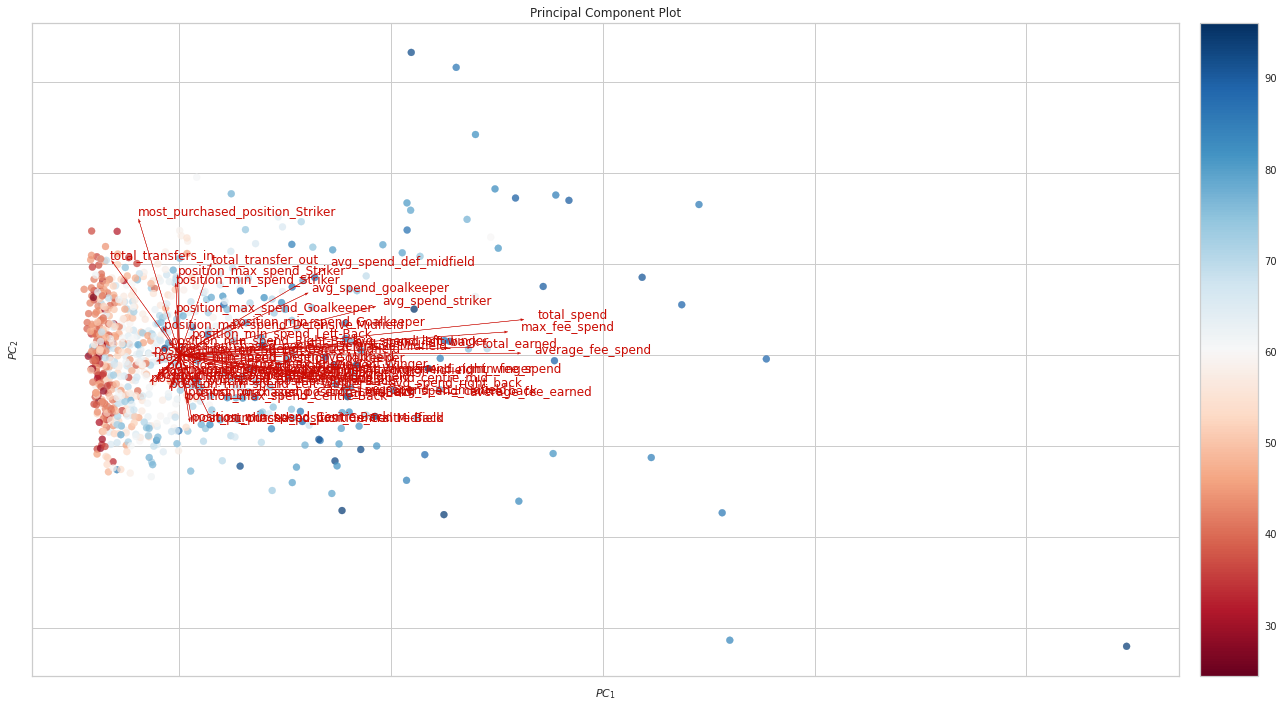

In [16]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)

visualizer = PCA(scale=True, proj_features=True)
visualizer.fit_transform(X, y)
visualizer.show();

---

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

from sklearn.pipeline import Pipeline
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.model_selection import KFold

from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error
from yellowbrick.model_selection import cv_scores

 LinearRegression() 


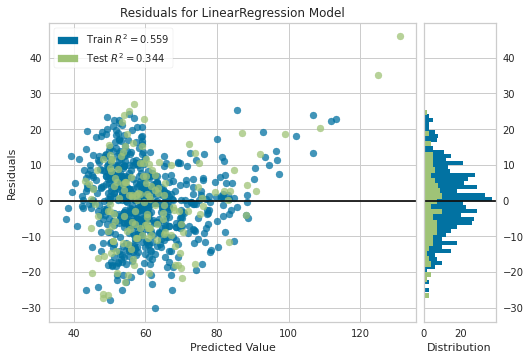

 Ridge() 


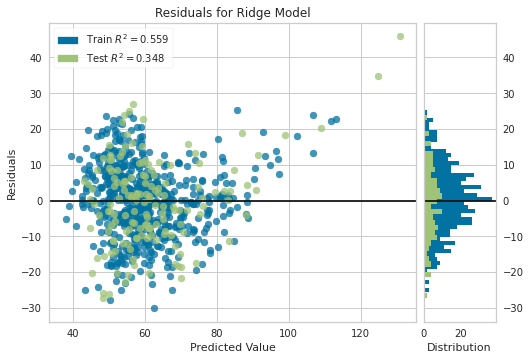

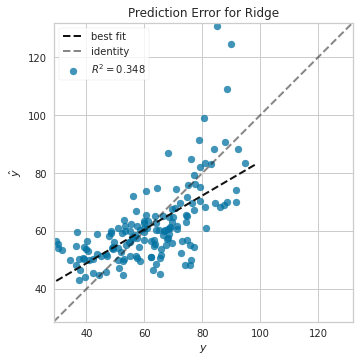

 Lasso() 


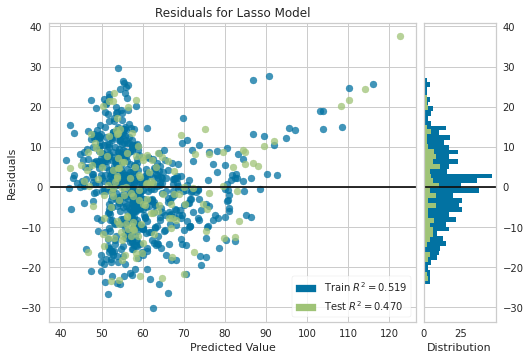

 ElasticNet() 


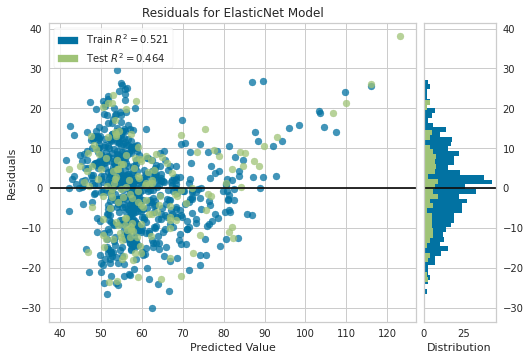

 OrthogonalMatchingPursuit() 


 BayesianRidge() 


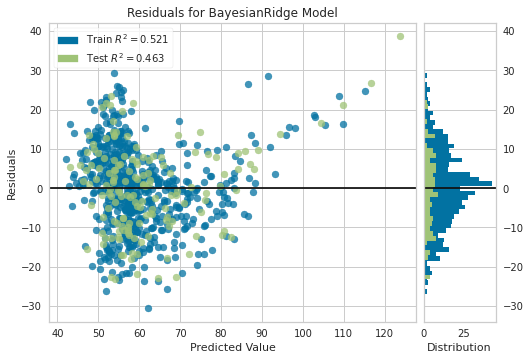

 ARDRegression() 


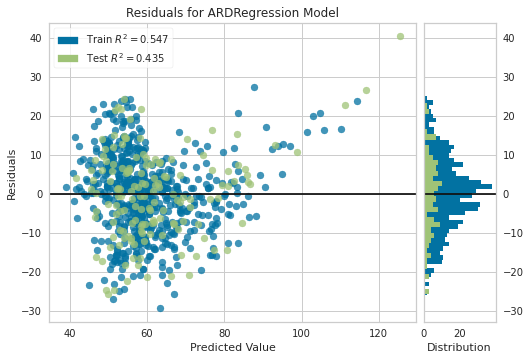

 SVR() 


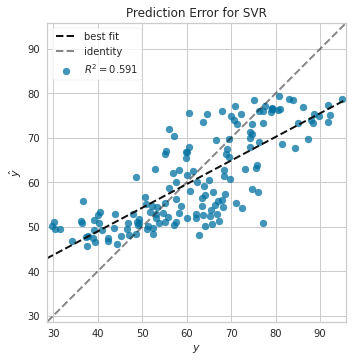

 DecisionTreeRegressor(max_depth=5) 


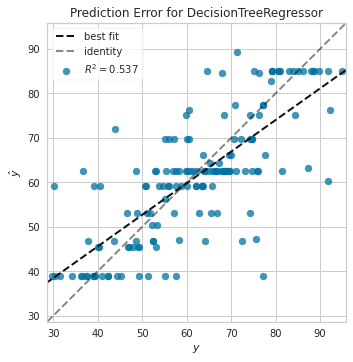

 RandomForestRegressor(max_depth=5) 


 XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=3,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None) 


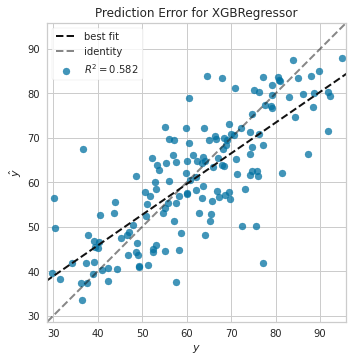

In [18]:
from yellowbrick.regressor import PredictionError

models = [
    LinearRegression(), 
    Ridge(), 
    Lasso(), 
    ElasticNet(), 
    OrthogonalMatchingPursuit(), 
    BayesianRidge(),
    ARDRegression(), 
    SVR(), 
    DecisionTreeRegressor(max_depth=5), 
    RandomForestRegressor(max_depth=5),
    xgb.XGBRegressor(max_depth=3)
]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def visualize_model(X_train, X_test, y_train, y_test, estimator, **kwargs): 
    print('\033[1m {} \033[0m'.format(estimator))
    resid_plot = ResidualsPlot(model)
    resid_plot.fit(X_train, y_train)
    resid_plot.score(X_test, y_test)
    resid_plot.show();
    
    pred_error = PredictionError(model)
    pred_error.fit(X_train, y_train)
    pred_error.score(X_test, y_test)
    pred_error.show();
    
for model in models:
    visualize_model(X_train, X_test, y_train, y_test, model)

In [19]:
model_scores = pd.DataFrame({'Model': [type(i).__name__ for i in models],
                'R\u00b2 score': [0.344, 0.348, 0.470, 0.464,
                                  0.470, 0.463, 0.435, 0.591, 
                                  0.554, 0.637, 0.582]})

model_scores.sort_values(by='R\u00b2 score', ascending=False)

Model  R² score
9       RandomForestRegressor     0.637
7                         SVR     0.591
10               XGBRegressor     0.582
8       DecisionTreeRegressor     0.554
2                       Lasso     0.470
4   OrthogonalMatchingPursuit     0.470
3                  ElasticNet     0.464
5               BayesianRidge     0.463
6               ARDRegression     0.435
1                       Ridge     0.348
0            LinearRegression     0.344

In [20]:
from sklearn.model_selection import GridSearchCV
# SVR

param_grid = {'C': [100, 10, 1.0, 0.1, 0.01],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

svr_gs = GridSearchCV(SVR(),
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='r2',
                      cv=10)

svr_grid = svr_gs.fit(X_train, y_train)
svr_optimal = svr_grid.best_estimator_
result = svr_gs.cv_results_

print('Best Parameters: ', svr_gs.best_params_)
print('Best Score: ', svr_gs.best_score_)

svr_optimal.fit(X_train, y_train)

Best Parameters:  {'C': 10, 'gamma': 0.001}
Best Score:  0.6251988394011225


SVR(C=10, gamma=0.001)

In [21]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = np.arange(100, 1000, 100)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap
             }

rf_gs = RandomizedSearchCV(RandomForestRegressor(),
                      return_train_score=True,
                      param_distributions=param_grid,
                      scoring='r2',
                      cv=10)

rf_grid = rf_gs.fit(X_train, y_train)
rf_optimal = rf_grid.best_estimator_
result = rf_gs.cv_results_

print('Best Parameters: ', rf_gs.best_params_)
print('Best Score: ', rf_gs.best_score_)

rf_optimal.fit(X_train, y_train)

Best Parameters:  {'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}
Best Score:  0.6537969498867676


RandomForestRegressor(max_depth=100, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=600)

In [22]:
# XGBRegressor


params_grid = {'max_depth': [3, 5, 6, 10, 15, 20],
          'min_child_weight': [3, 5, 7, 9],
          'learning_rate': [0.01, 0.1, 0.2, 0.3],
          'n_estimators': [100, 500, 1000],
          'colsample_bytree': np.arange(0.4, 1.0, 0.1),
          'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
          'subsample': np.arange(0.5, 1.0, 0.1)}

xgb = xgb.XGBRegressor(seed = 42)


xgb_gs = RandomizedSearchCV(xgb,
                      return_train_score=True,
                      param_distributions=params_grid,
                      scoring='r2',
                      cv=10)

xgb_grid = xgb_gs.fit(X_train, y_train)
xgb_optimal = xgb_grid.best_estimator_
result = xgb_gs.cv_results_

print('Best Parameters: ', xgb_gs.best_params_)
print('Best Score: ', xgb_gs.best_score_)

xgb_optimal.fit(X_train, y_train)

Best Parameters:  {'subsample': 0.7, 'n_estimators': 1000, 'min_child_weight': 9, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.7999999999999999, 'colsample_bylevel': 0.5}
Best Score:  0.6432050138048019


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
             colsample_bynode=1, colsample_bytree=0.7999999999999999, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=9, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             subsample=0.7, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [24]:
best_model = rf_optimal
best_model

RandomForestRegressor(max_depth=100, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=600)

# PART THE LAST: Explaining the Model

In [31]:
feature_names = X.columns

In [51]:
explainer = shap.Explainer(best_model, feature_names=feature_names)
shap_values = explainer(X_test)

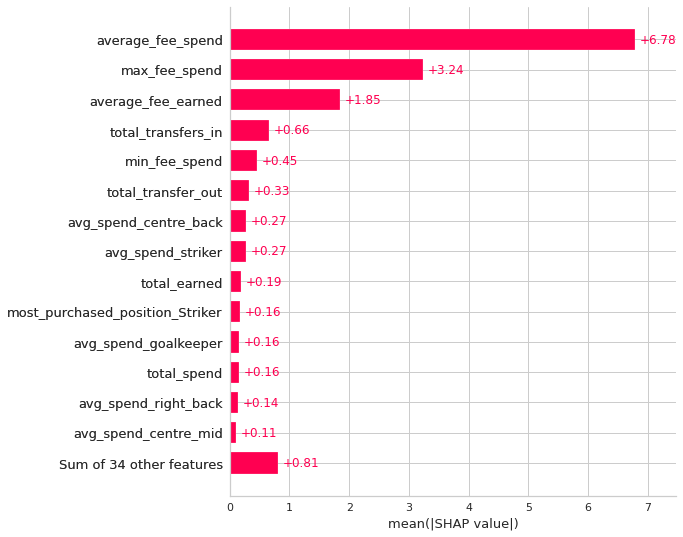

In [34]:
shap.plots.bar(shap_values, max_display=15)

In [25]:
import shap

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


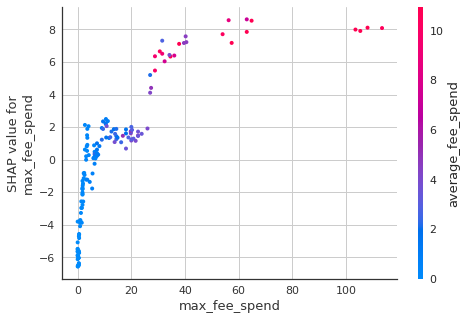

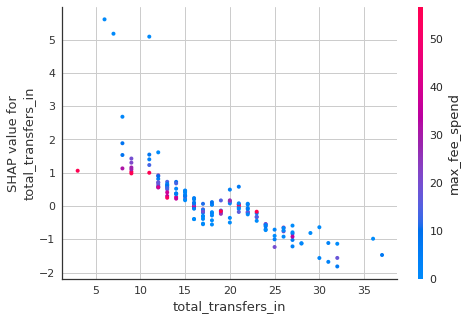

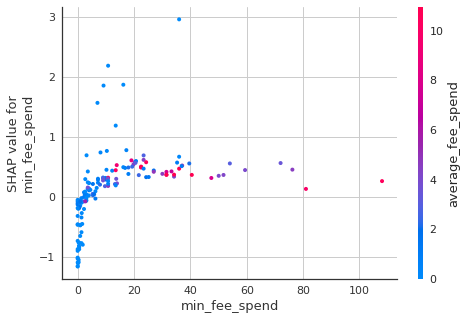

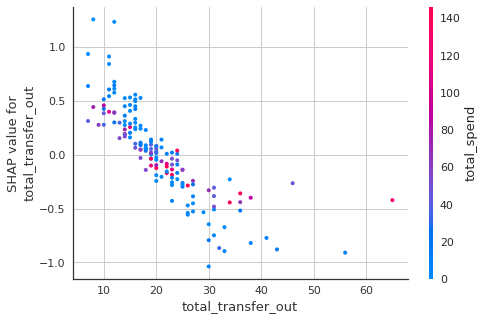

In [26]:
# FLAG

features = ['average_fee_spend', 'max_fee_spend', 'average_fee_earned', 
            'total_transfers_in', 'min_fee_spend', 'total_transfer_out']

for feature in features:
    shap.dependence_plot(feature, shap_values, X_test)

In [30]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test)

In [35]:
shap.plots.bar(shap_values.cohorts(2).abs.mean(0))

In [61]:
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

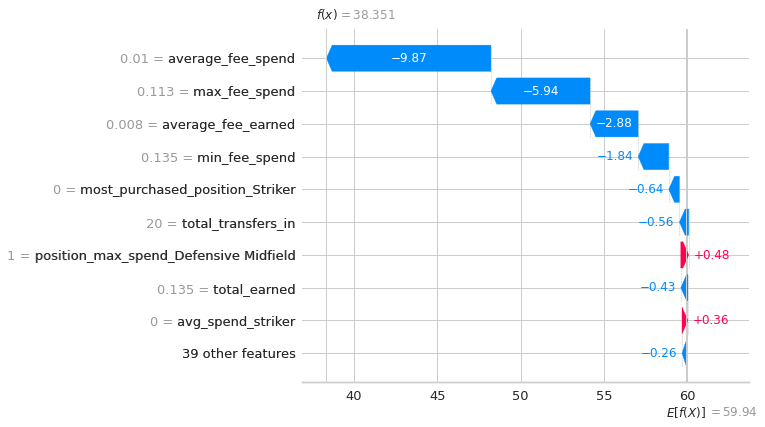

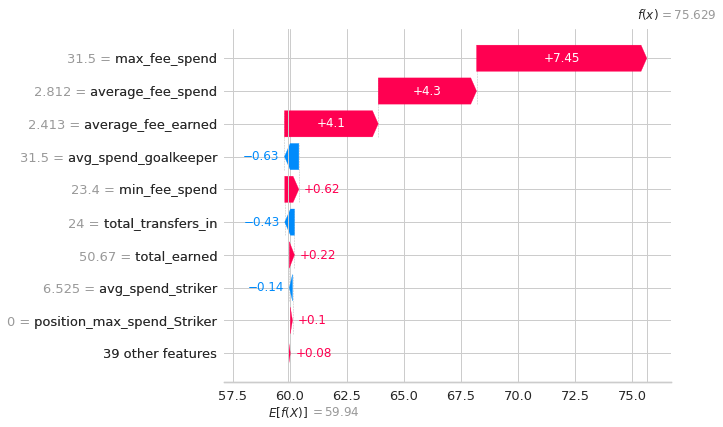

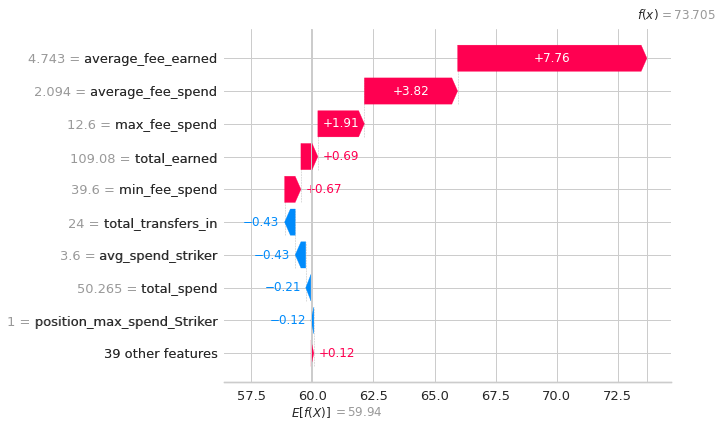

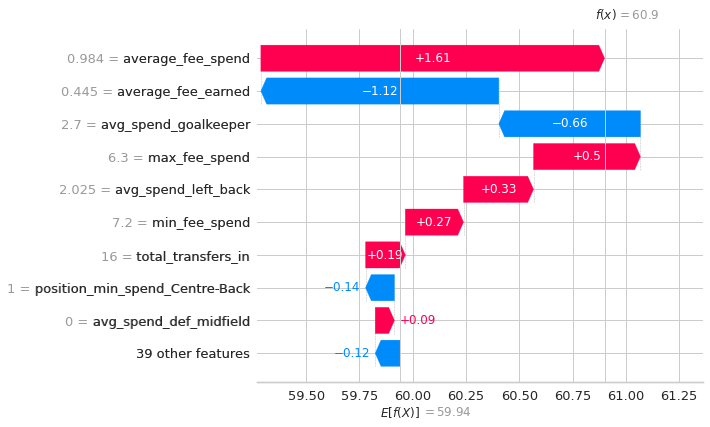

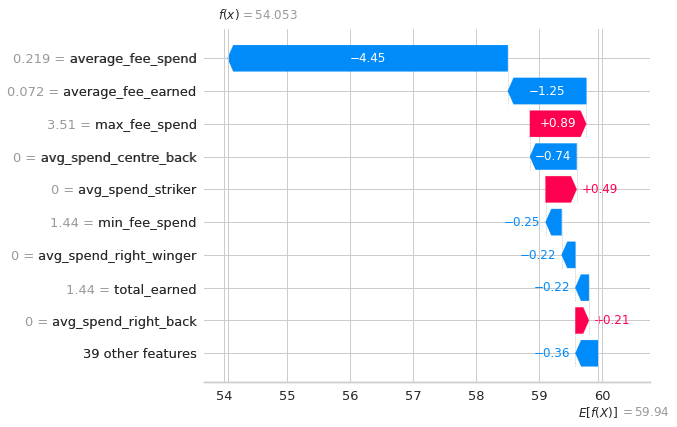

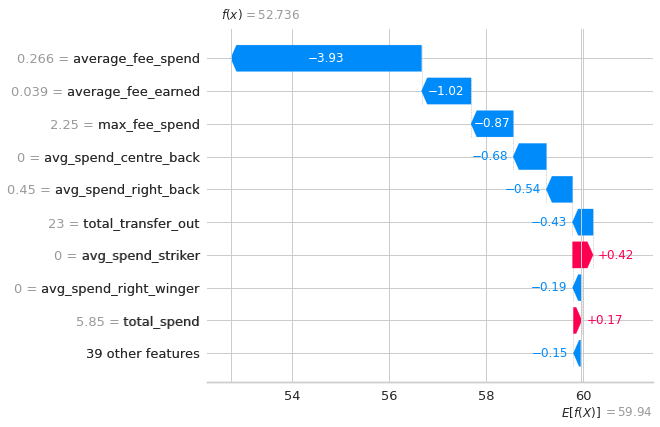

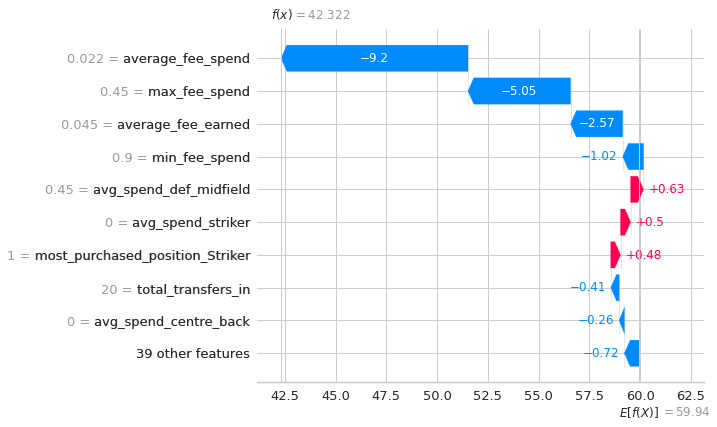

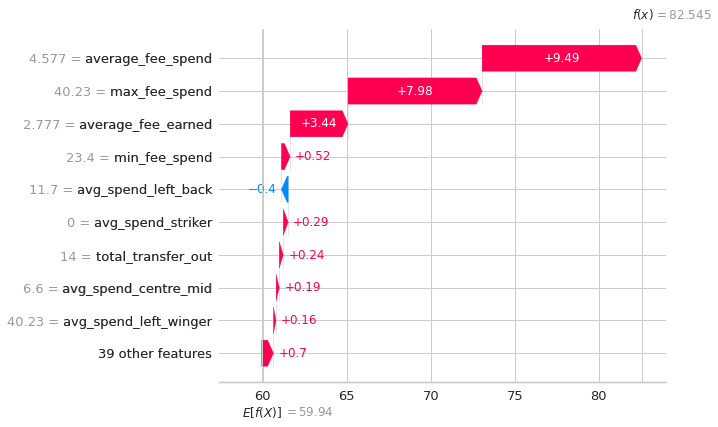

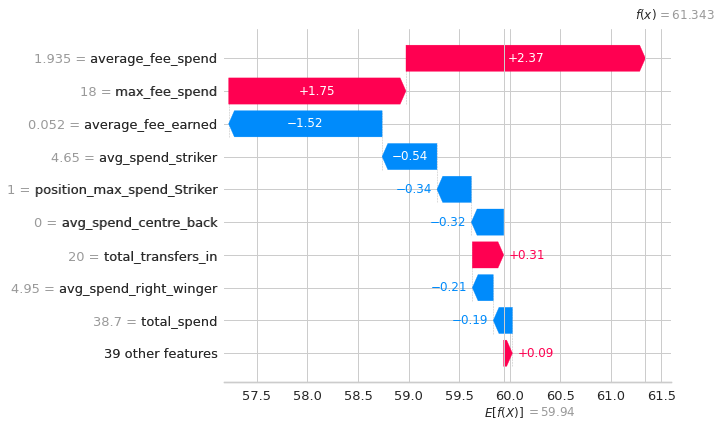

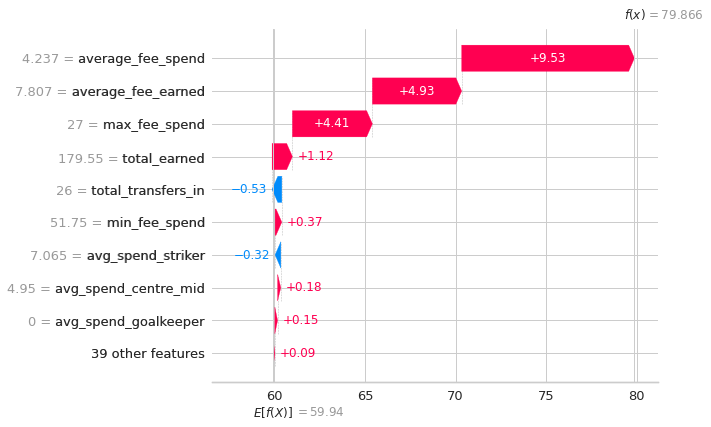

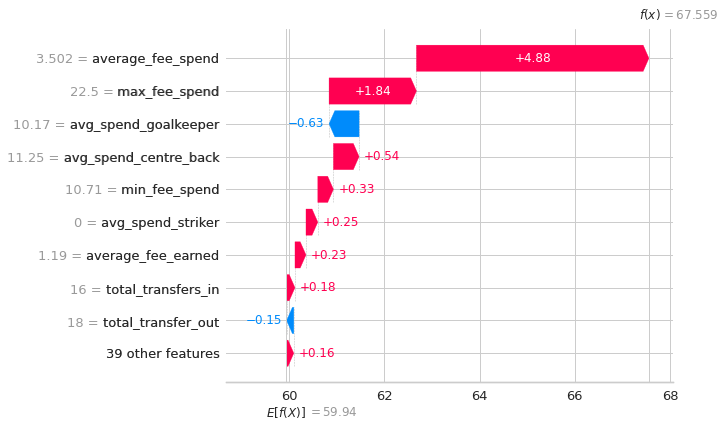

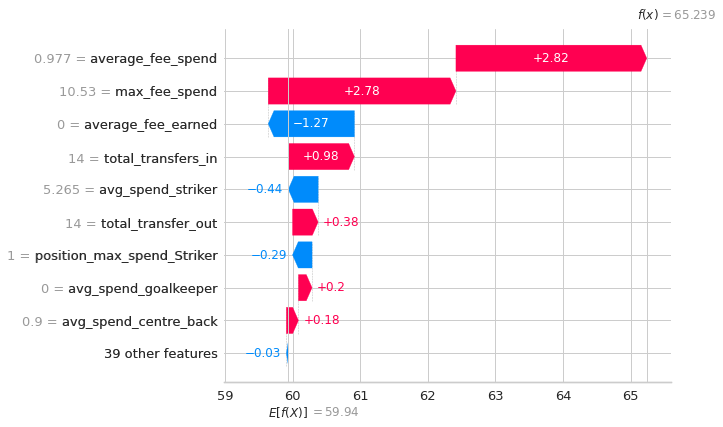

In [95]:
for i in np.arange(1, 151, 10):
    shap.plots.waterfall(shap_values[i])

In [69]:
explainer = shap.TreeExplainer(best_model)
expected_value = explainer.expected_value

In [80]:
feature_names = list(X_train.columns)

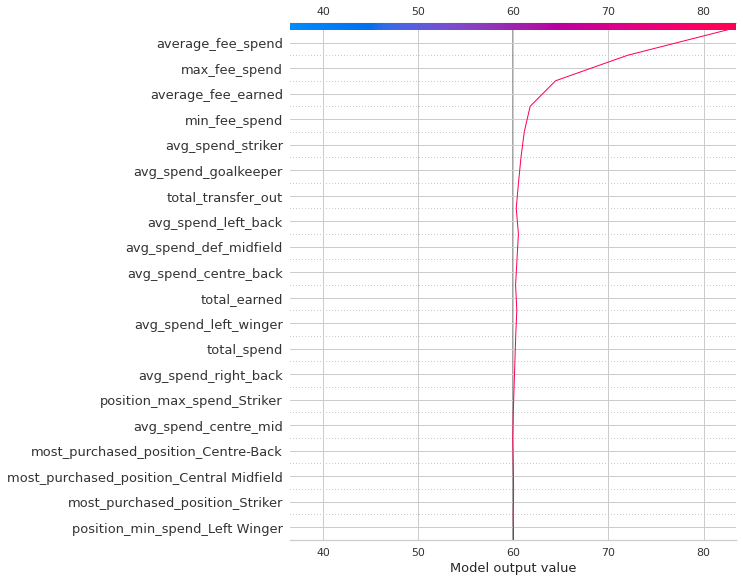

In [99]:
observations = [51, 81]

for obs in observations:
    shap.decision_plot(expected_value, explainer.shap_values(X_test)[obs], feature_names=feature_names)

In [103]:
for obs in observations:
    display(shap.force_plot(expected_value, explainer.shap_values(X_test)[obs], feature_names=feature_names))

In [104]:
import pickle

filename = 'finalized_model_random_forest.sav'
pickle.dump(model, open(filename, 'wb'))